In [1]:
#from ipsl_dcpp.model.ipsl_dataset import IPSL_DCPP
import torch
import lightning as pl
#from ipsl_dcpp.model.pangu import PanguWeather
from hydra import compose, initialize
from omegaconf import OmegaConf
import numpy as np
import hydra
import os
import pickle
import io
import numpy as np
from matplotlib import animation
import xarray as xr 
#os.environ['SLURM_NTASKS_PER_NODE'] = '1'
#torch.set_default_dtype(torch.float32)
# os.environ["CUDA_VISIBLE_DEVICES"]=""
#torch.set_default_tensor_type(torch.FloatTensor)

with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
pl.seed_everything(cfg.seed)
val = hydra.utils.instantiate(
    cfg.dataloader.dataset,domain='val',debug=True,z_normalize=True
)
val_loader = torch.utils.data.DataLoader(val, 
                                            batch_size=cfg.batch_size,
                                            num_workers=cfg.cluster.cpus,
                                            shuffle=True) 


[rank: 0] Seed set to 0
2it [00:04,  2.18s/it]
/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.2.0+py3.11.7/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [2]:
import xarray as xr
sample = xr.open_dataset(val.files[0])

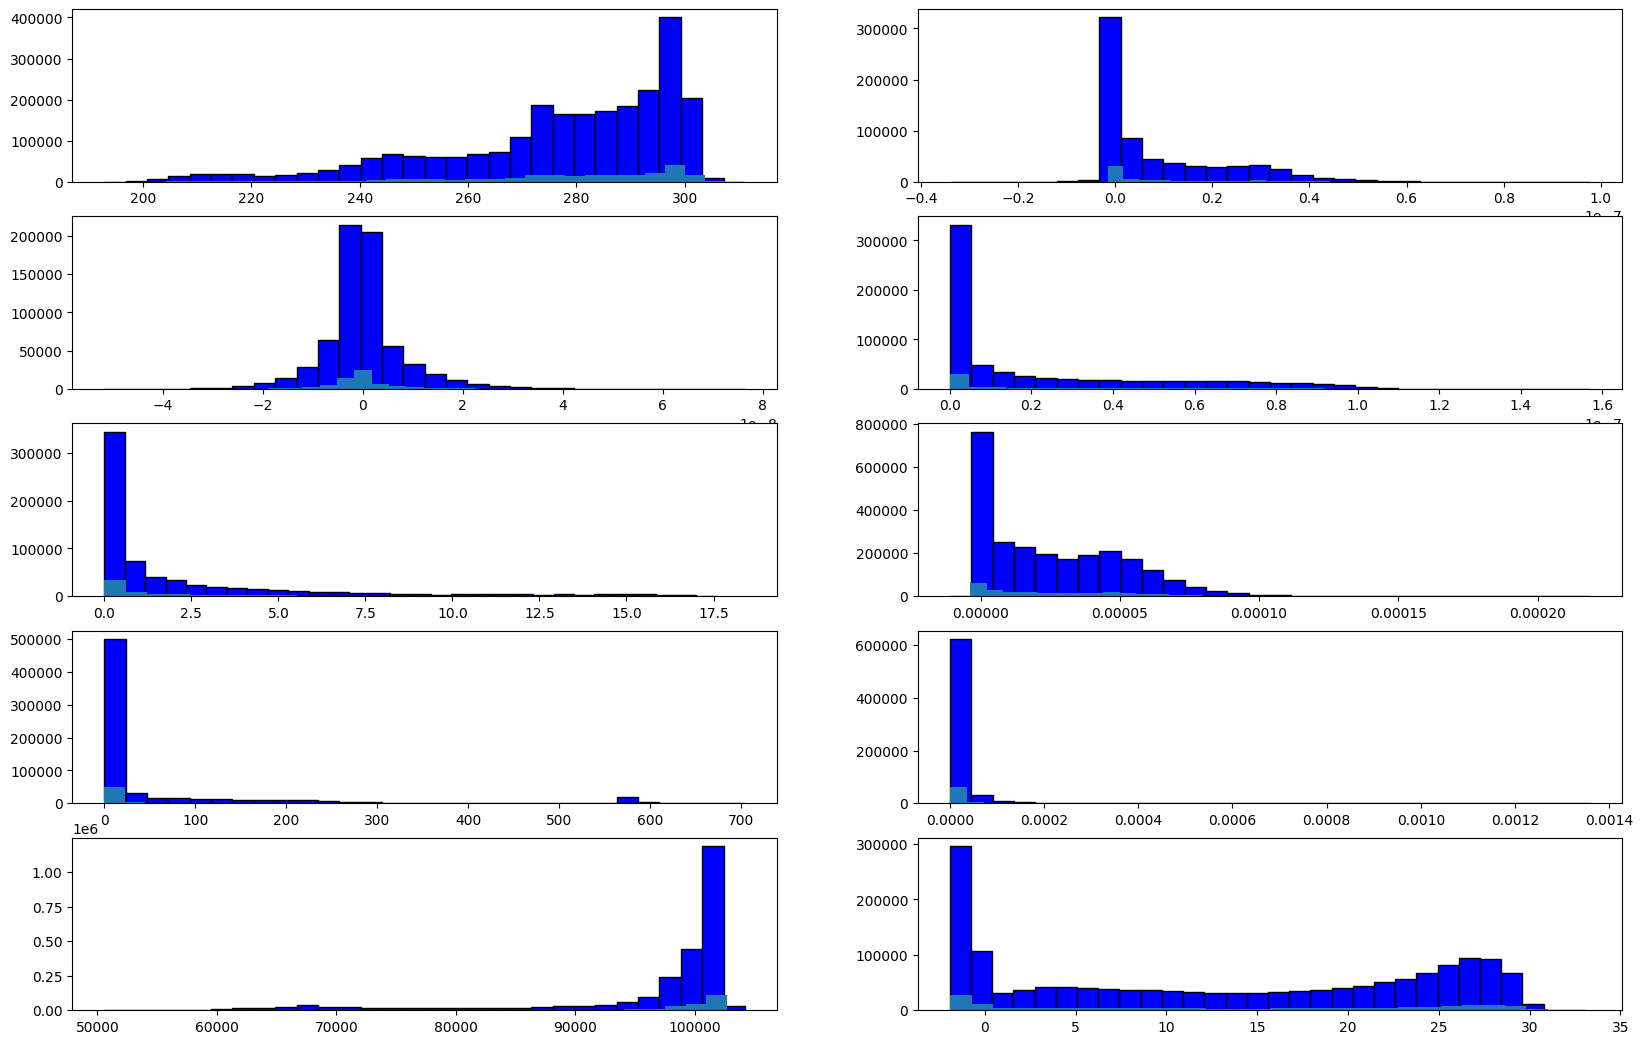

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(val.surface_variables)//2,2, figsize=(20, 13))
axes = axes.flatten()
for i in range (len(val.surface_variables)):
    axes[i].hist(sample[val.surface_variables[i]].data.flatten(),color='blue',ec='black',bins=30)
    axes[i].hist(val.surface_means[:,i].flatten(), bins=30)

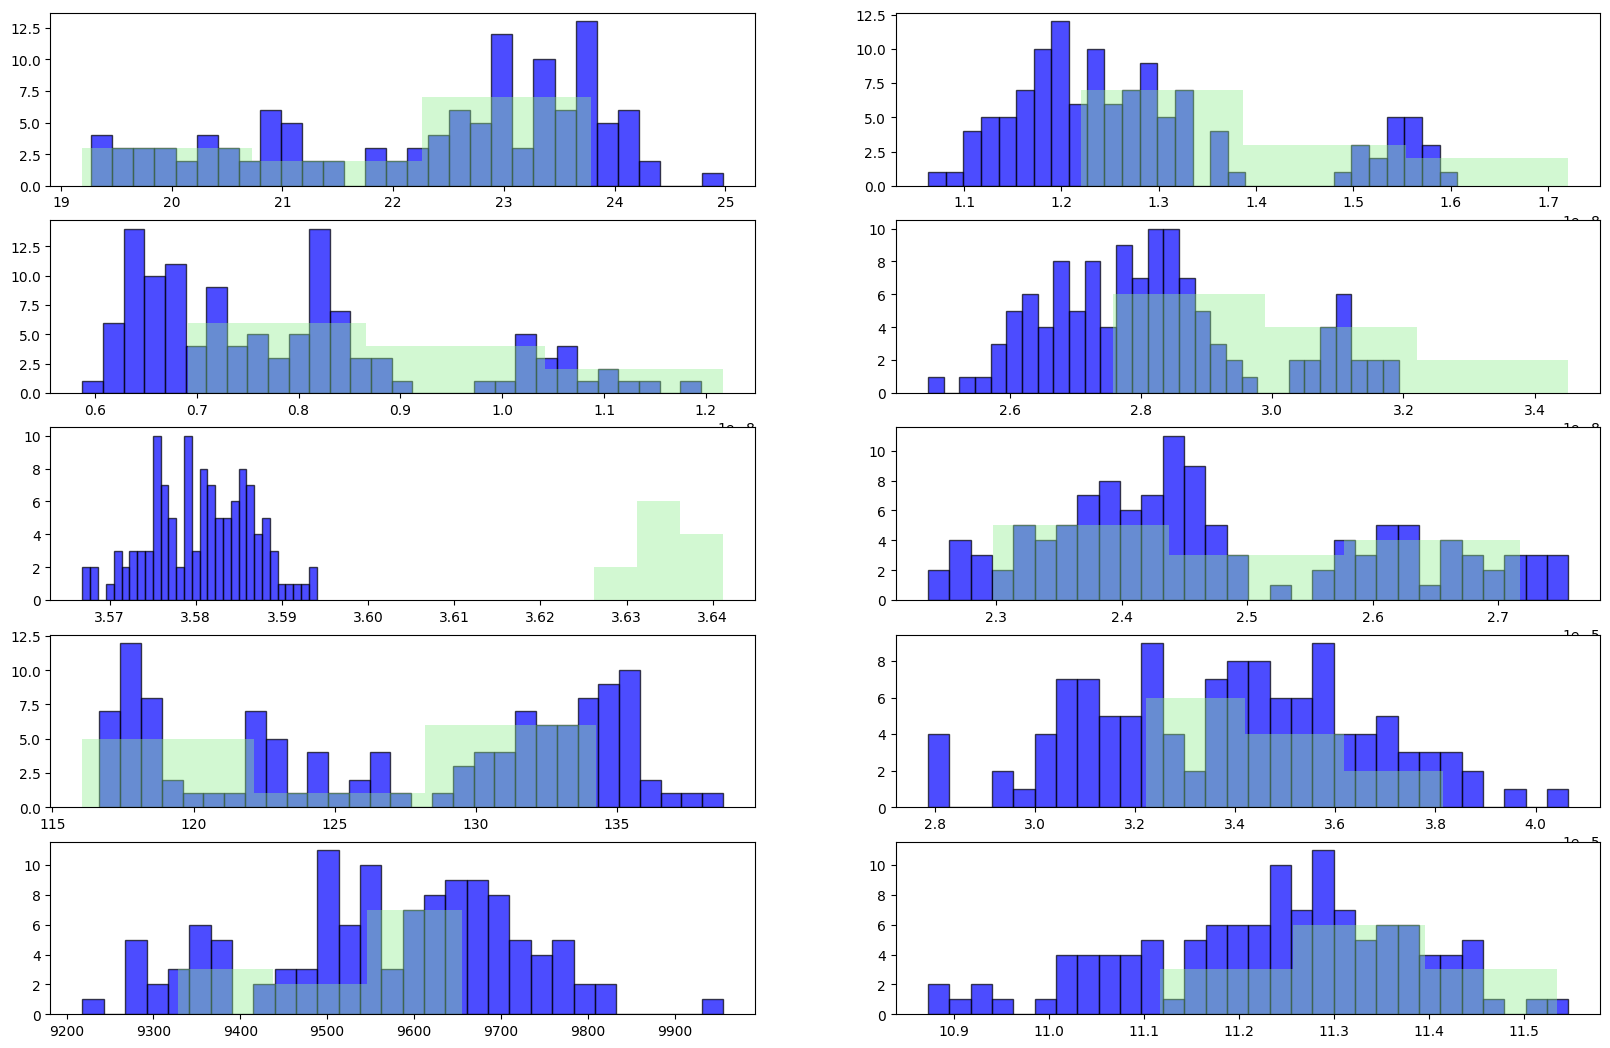

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(val.surface_variables)//2,2, figsize=(20, 13))
axes = axes.flatten()
for i in range (len(val.surface_variables)):
    axes[i].hist(np.nanstd(sample[val.surface_variables[i]].data,axis=(-1,-2)),color='blue',ec='black',bins=30,alpha=0.7)
    axes[i].hist(np.nanmean(val.surface_stds[:,i],axis=(-1,-2)), color='lightgreen',bins=3,alpha=0.4)

/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.2.0+py3.11.7/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])


/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.2.0+py3.11.7/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])
torch.Size([10, 1, 1])
torch.Size([8, 3, 1, 1])


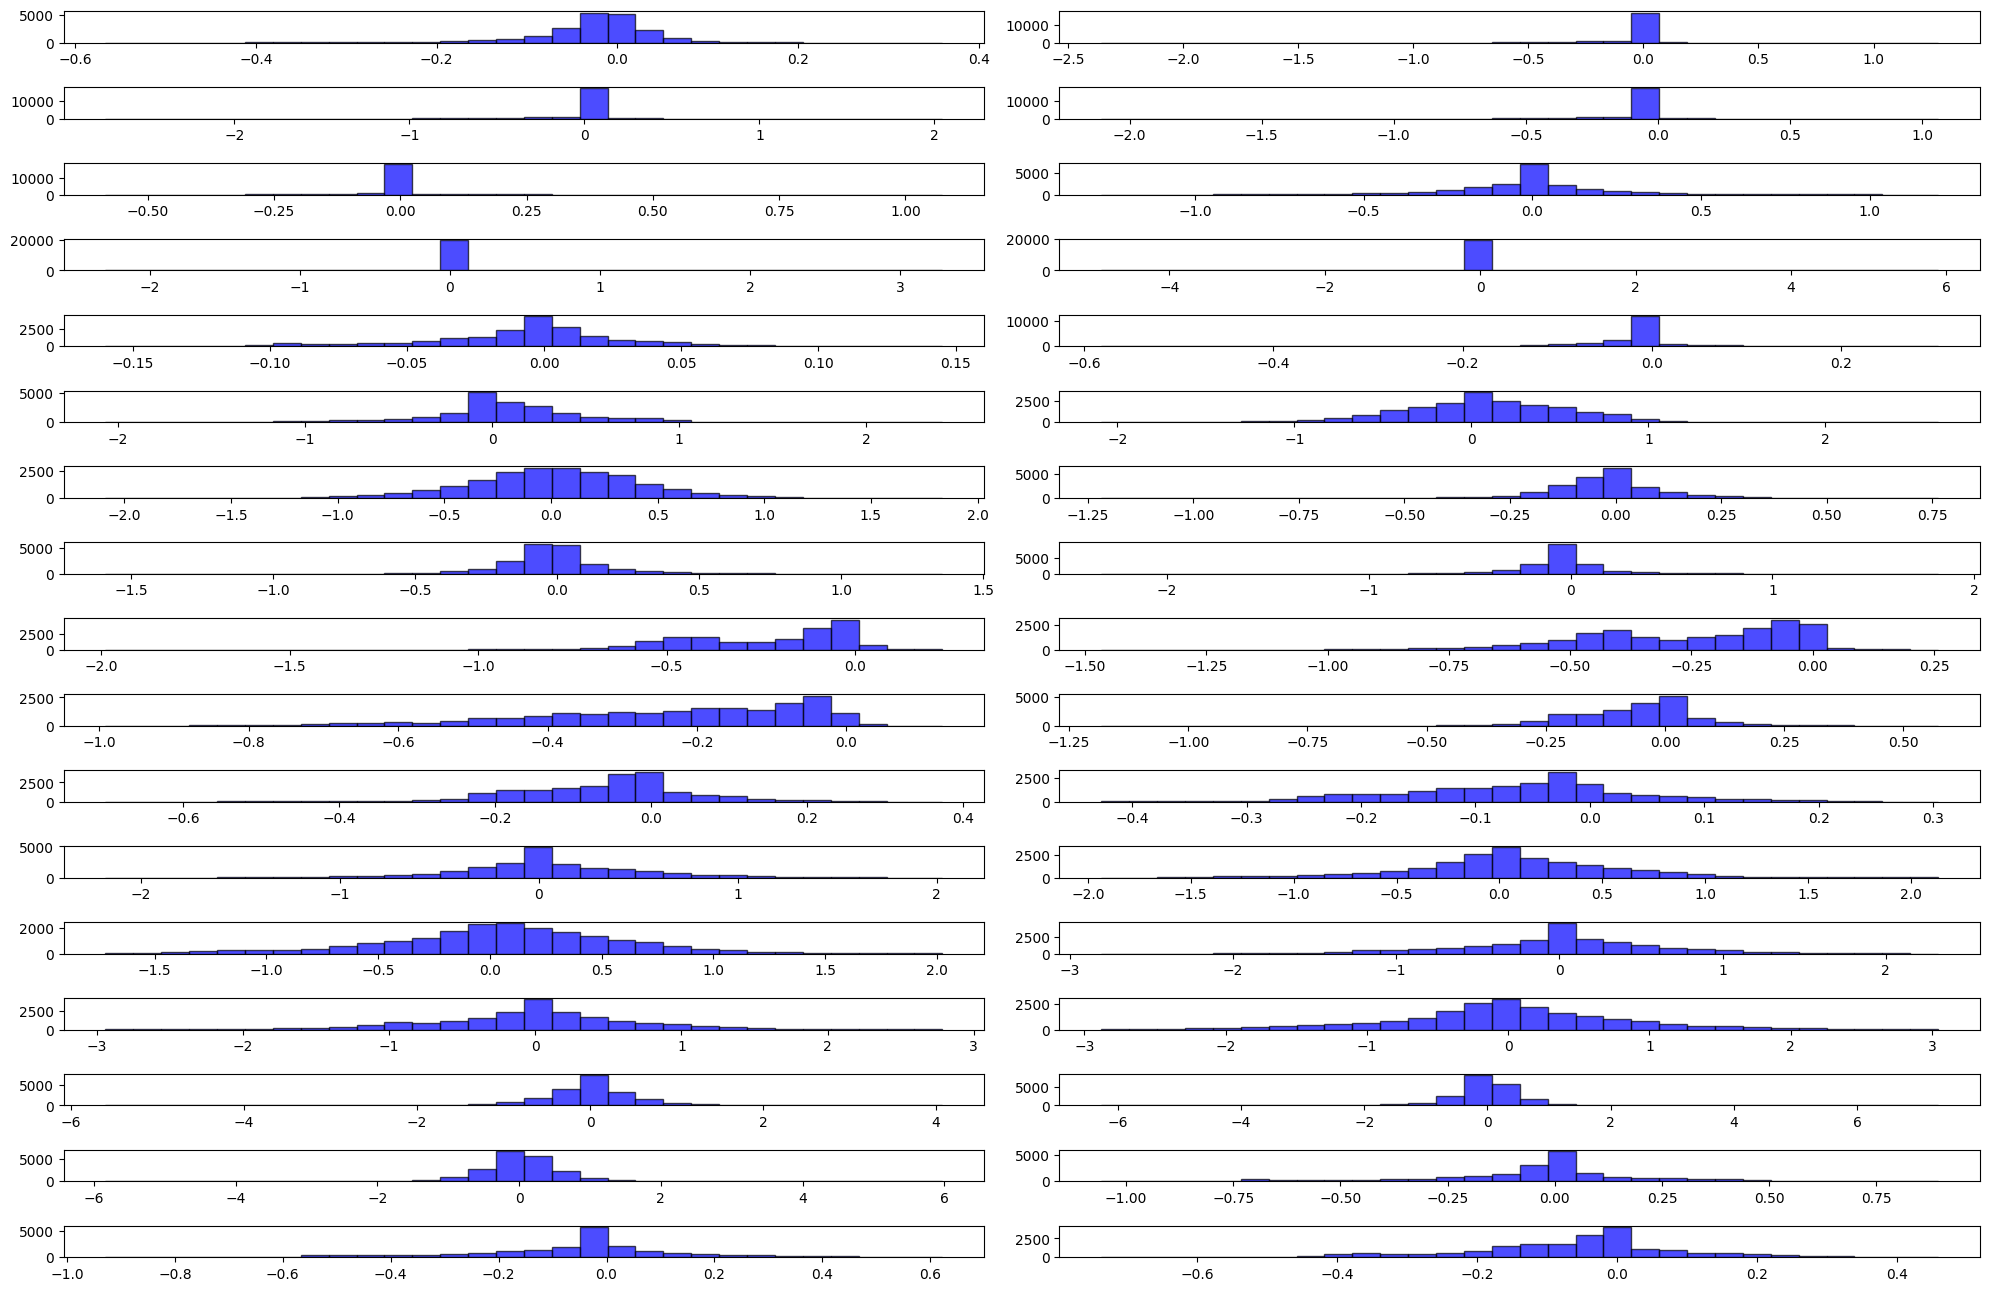

In [13]:
#test that batch is normalized properly

normalized_batch = next(iter(val_loader))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(34//2,2, figsize=(20, 13))
axes = axes.flatten()
for i in range (34):
    axes[i].hist(normalized_batch['state_surface'][:,i].flatten(),color='blue',ec='black',bins=30,alpha=0.7)
   # axes[i].hist(np.nanmean(val.surface_stds[:,i],axis=(-1,-2)), color='lightgreen',bins=3,alpha=0.4)
fig.tight_layout()


/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.2.0+py3.11.7/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.2.0+py3.11.7/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


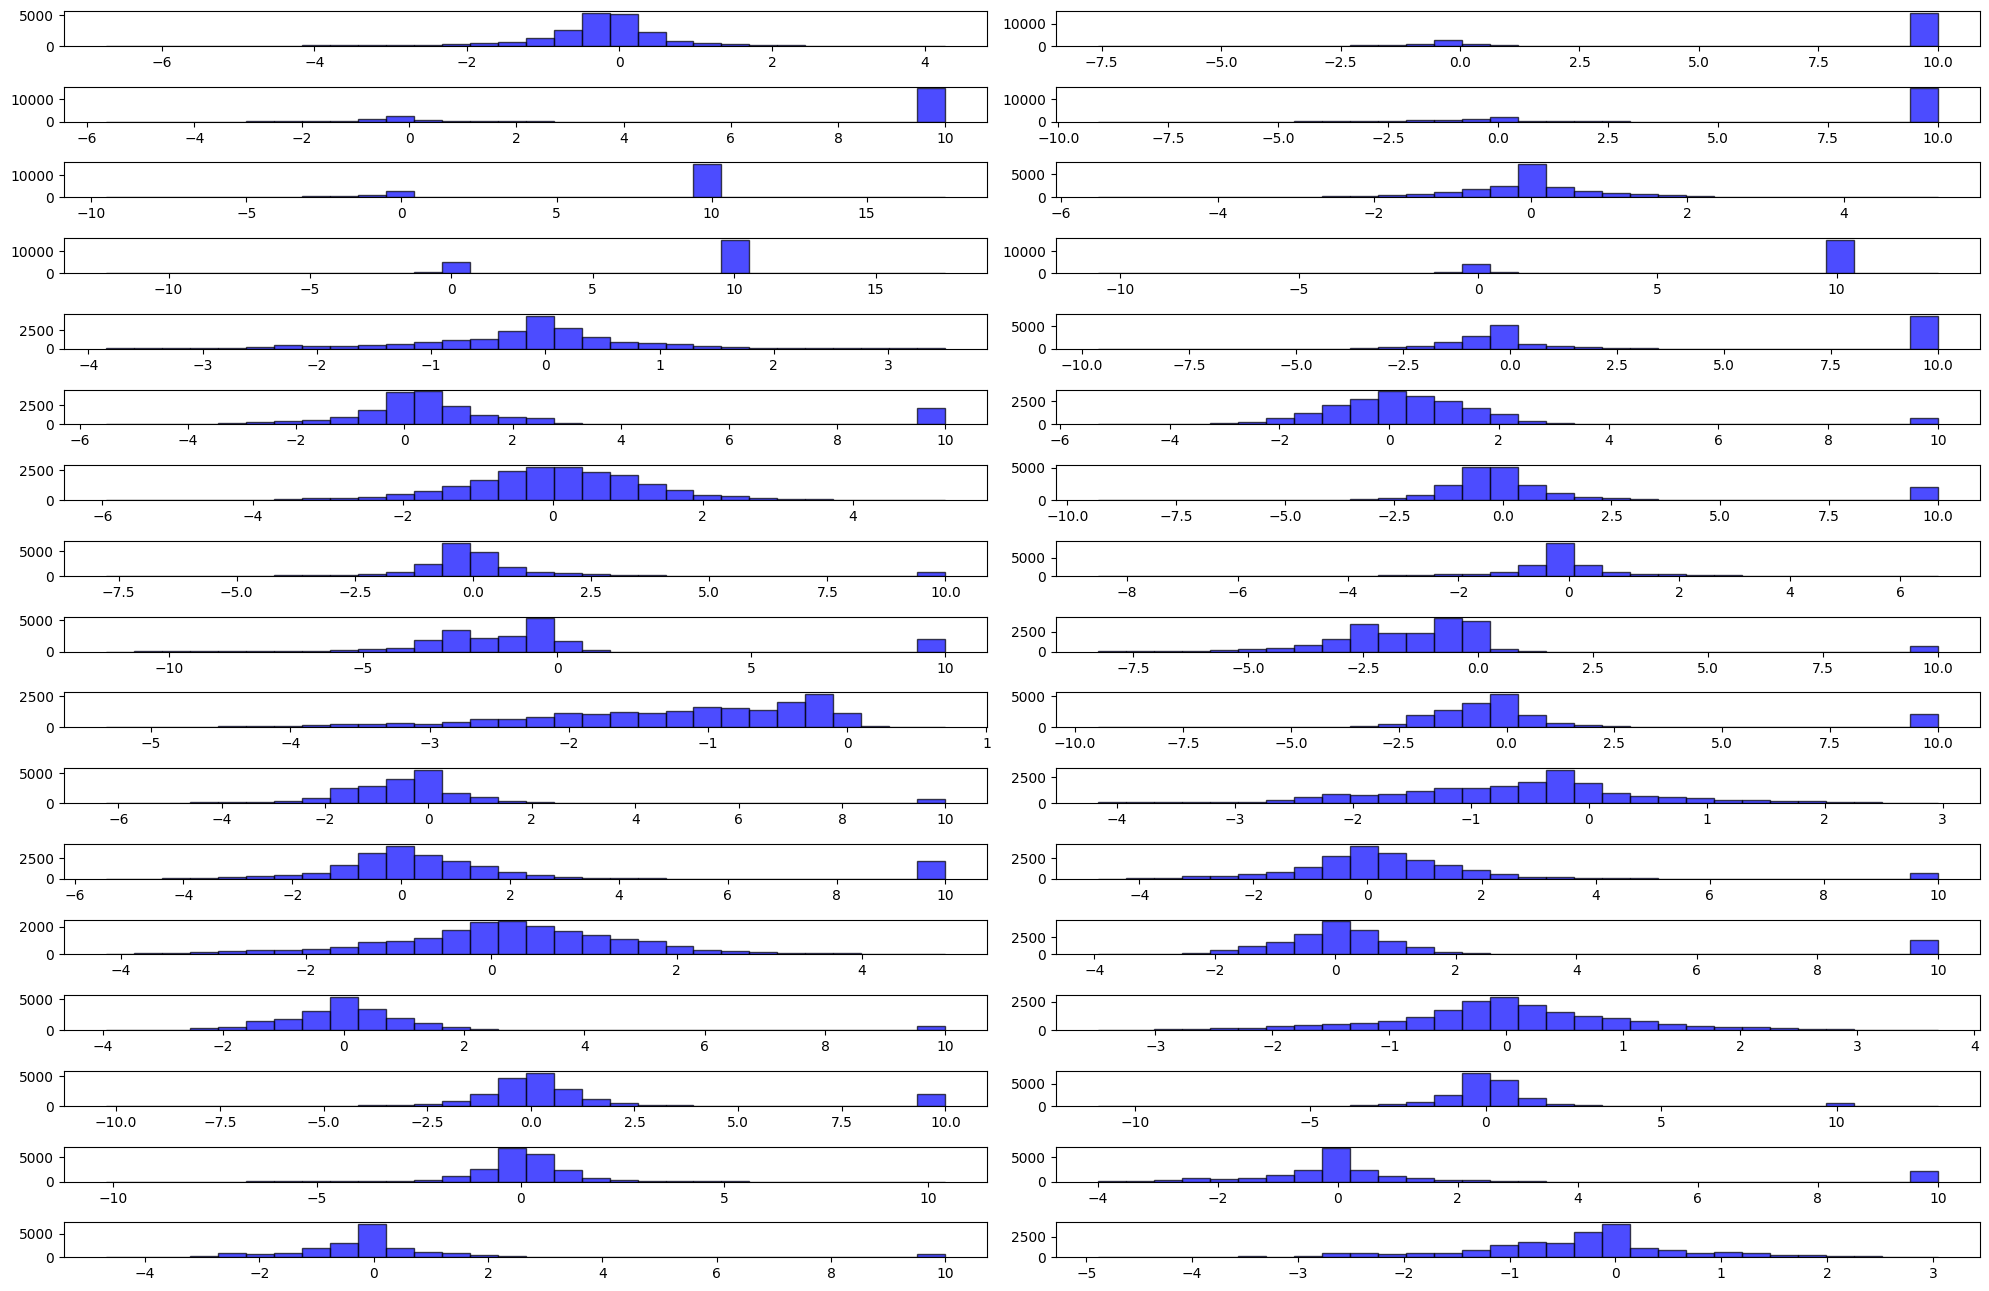

In [2]:
#test that batch is normalized properly

normalized_batch = next(iter(val_loader))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(34//2,2, figsize=(20, 13))
axes = axes.flatten()
for i in range (34):
    axes[i].hist(normalized_batch['state_surface'][:,i].flatten(),color='blue',ec='black',bins=30,alpha=0.7)
   # axes[i].hist(np.nanmean(val.surface_stds[:,i],axis=(-1,-2)), color='lightgreen',bins=3,alpha=0.4)
fig.tight_layout()
